In [132]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input100sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0.001,0.4,0.06)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
accuracy_10_samples = np.zeros((10,10,10))


0.84765625
0.9296875
0.9140625
0.8593750000000001
0.9453125
0.84765625
0.93359375
0.8906249999999999
0.89453125
0.90234375


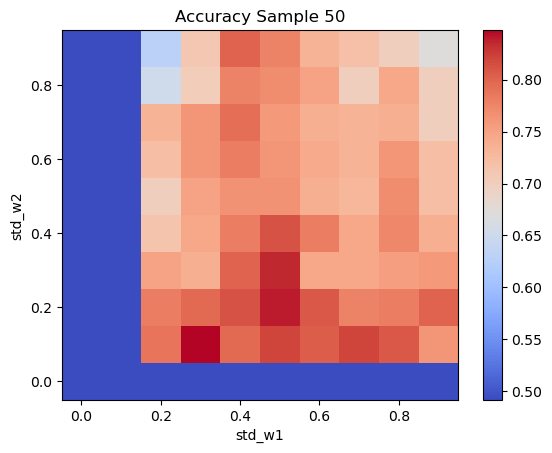

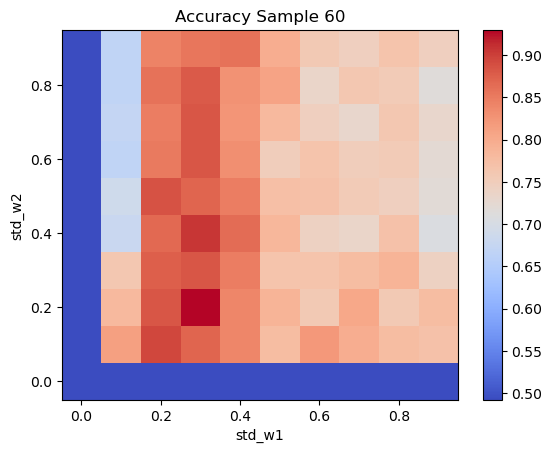

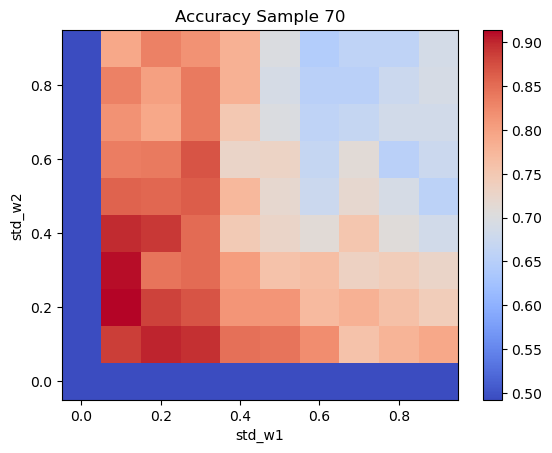

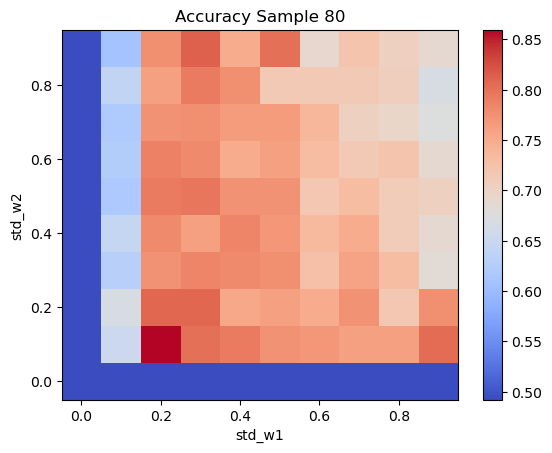

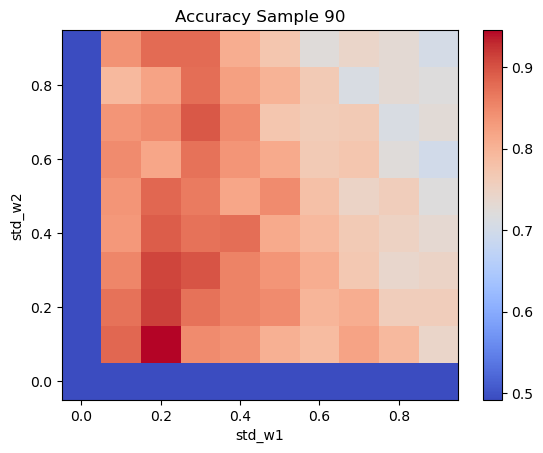

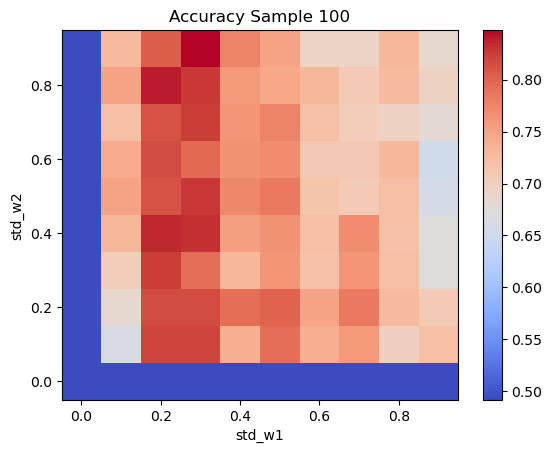

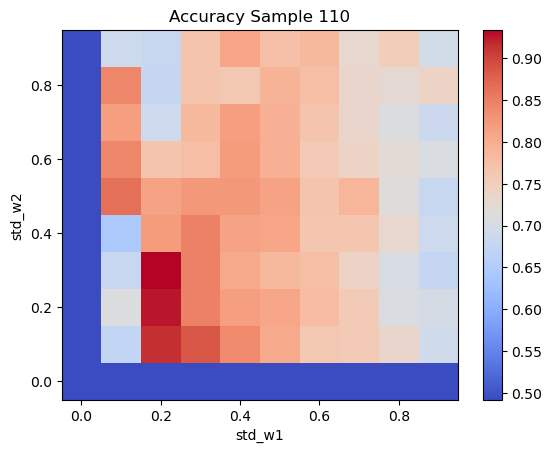

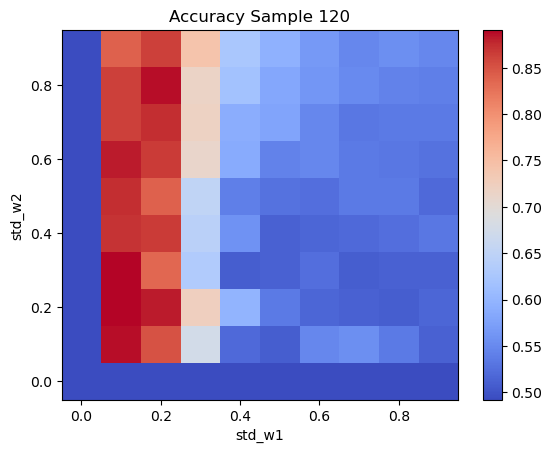

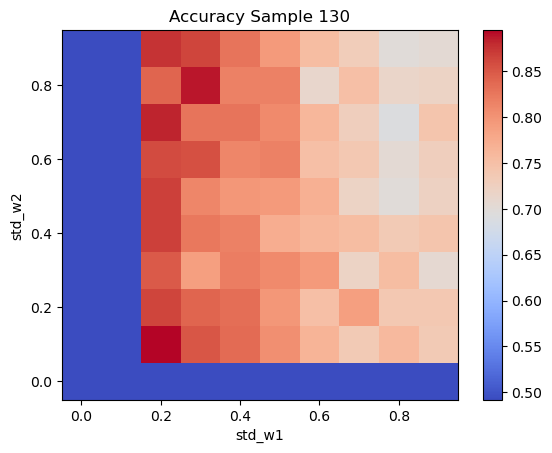

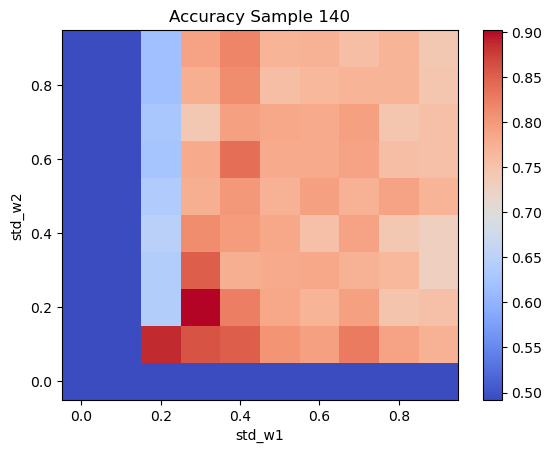

In [133]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes()
    b = ax.pcolormesh(axis_std_w1, axis_std_w2, data['accuracy_w1_w2'].T*100, cmap ='coolwarm')
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]*100
    max_accuracy = np.max(accuracy_10_samples[i])
    index_max_accuracy = np.argmax(accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [134]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
std_dev_accuracy_grid_10_by_10_10_samples = np.std(accuracy_10_samples, axis=0)

In [135]:
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.69335938, 0.69960937, 0.69023437, 0.67773438,
        0.69648438, 0.6921875 , 0.68242187, 0.68671875, 0.6640625 ],
       [0.4921875 , 0.87578125, 0.83984375, 0.8234375 , 0.81835938,
        0.80859375, 0.79570312, 0.78828125, 0.77539062, 0.78007812],
       [0.4921875 , 0.83554688, 0.840625  , 0.80703125, 0.80976563,
        0.80390625, 0.80898437, 0.80546875, 0.80664062, 0.80859375],
       [0.4921875 , 0.79023438, 0.79375   , 0.77304688, 0.77890625,
        0.77109375, 0.775     , 0.77695313, 0.77539062, 0.7859375 ],
       [0.4921875 , 0.7734375 , 0.77773437, 0.76210937, 0.75507813,
        0.75703125, 0.75234375, 0.75234375, 0.74804688, 0.75273437],
       [0.4921875 , 0.7609375 , 0.74492187, 0.74101562, 0.728125  ,
        0.72539062, 0.721875  , 0.72226563, 0.71640625, 0.71210938],
       [0.4921875 , 0.75898438, 0.7582031

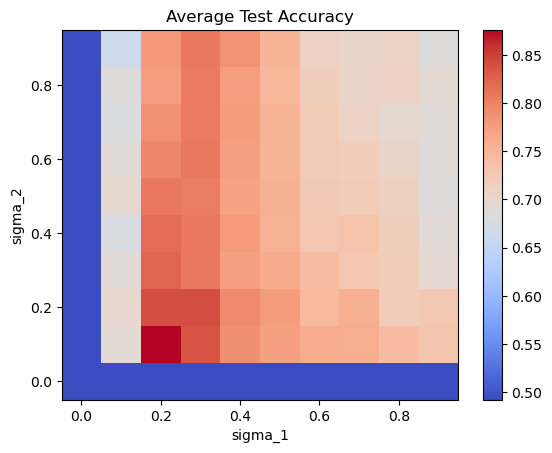

In [136]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(axis_std_w1, axis_std_w2, average_accuracy_grid_10_by_10_10_samples.T, cmap ='coolwarm')
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_accuracy_grid_100_0.1.png".format(sample))

In [137]:
average_accuracy_grid_10_by_10_10_samples >= 0.93*np.max(average_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False,  True,  True,  True,  True, False, False, False, False,
        False],
       [False,  True,  True, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

In [138]:
test1 = average_accuracy_grid_10_by_10_10_samples >= 0.92*np.max(average_accuracy_grid_10_by_10_10_samples)

test2 = np.sort(np.extract(test1, average_accuracy_grid_10_by_10_10_samples))

test3 = np.argwhere(average_accuracy_grid_10_by_10_10_samples>0.80859374)

print(test2)


[0.80664062 0.80703125 0.80859375 0.80859375 0.80898437 0.80976563
 0.81835938 0.8234375  0.83554688 0.83984375 0.840625   0.87578125]


In [139]:
array = []
for t1 in test3:
    tbw1_w2= (np.array(t1)+np.array([0.5,0.5]))*0.1
    array.append(tbw1_w2)

In [140]:
i=0
for element in array:
    data = {}
    data['frequency'] = 65
    data['N'] = 100
    data['w1'] = element[0]/0.3445
    data['w2'] = element[1]/0.3445
    np.savez("accuracy_100_seed_{}.npz".format(i),**data)
    i+=1

In [141]:
data = {}
data['frequency'] = 65
data['N'] = 100
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("accuracy_100",**data)